In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [42]:
# Reading csv files
data = pd.read_csv("Electric_Production.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [43]:
data.index

Index(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01', '1939-05-01',
       '1939-06-01', '1939-07-01', '1939-08-01', '1939-09-01', '1939-10-01',
       ...
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
      dtype='object', name='DATE', length=954)

In [44]:
# Renaming column 
data.columns = ['Energy Production']

In [45]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [46]:
data.shape

(954, 1)

In [47]:
# Converting DATE into time series data from string type.
data.index = pd.to_datetime(data.index)

In [48]:
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='DATE', length=954, freq=None)

In [49]:
# Checking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 954 entries, 1939-01-01 to 2018-06-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Energy Production  954 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [50]:
# Importing seasonal_decompose from statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

# Setting data into trend,seasonal and residual
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

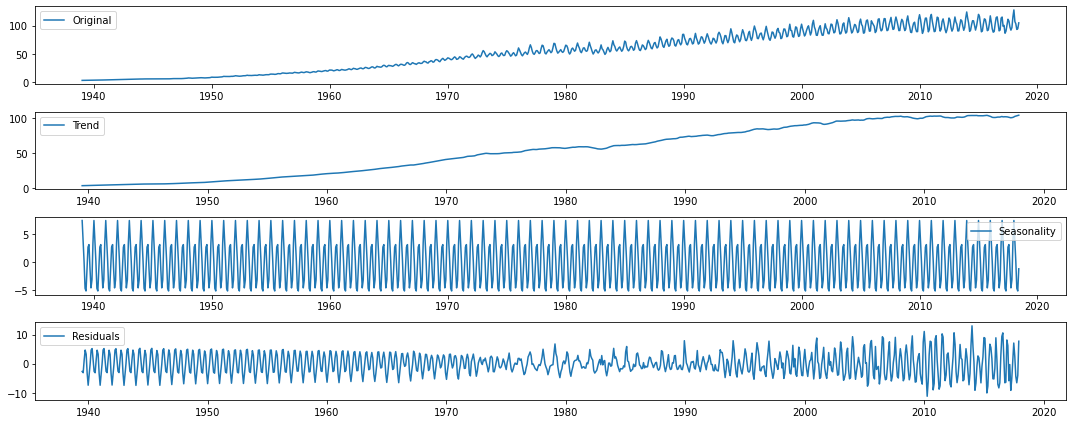

In [51]:
# Plotting using subplot
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [52]:
!pip install pmdarima

In [53]:
# Importing auto_arima from pmdarima
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data,start_=1,start_q=1,
                           max_p=3,max_q=3,m=12,
                           start_p=0,seasonal=True,
                           d=1,D=1,trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3849.507, Time=0.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4226.662, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4048.141, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3850.307, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4011.125, Time=0.22 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=3824.436, Time=0.98 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3899.506, Time=0.54 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3789.730, Time=2.91 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3844.227, Time=1.52 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=3870.108, Time=2.91 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3690.617, Time=4.55 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3722.200, Time=2.82 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3705.062, Time=1.70 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3728.477, Time=0.76 sec
 ARIMA(1,1,0)(2,1,2

In [54]:
stepwise_model.aic()

3687.480348024796

In [55]:
# Converting data into statinary time series
data2 = np.log(data) # Converting into log data

In [56]:
data2.head()

,Energy Production
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [57]:
# Train Test and Split
train = data2.loc['1939-01-01':'2016-12-01']
test = data2.loc['2016-01-01':]

In [58]:
train.head()

,Energy Production
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [59]:
train.tail()

,Energy Production
DATE,
2016-08-01,4.749101
2016-09-01,4.626763
2016-10-01,4.507477
2016-11-01,4.524756
2016-12-01,4.729683


In [60]:
test.head()

,Energy Production
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


In [61]:
test.tail()

,Energy Production
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [62]:
len(test)

30

In [63]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [64]:
future_forecast = stepwise_model.predict(n_periods = 30)

In [65]:
future_forecast

array([4.82643292, 4.72601581, 4.62408045, 4.52323631, 4.54483845,
       4.66757665, 4.75618505, 4.7551035 , 4.64898302, 4.54853829,
       4.58315889, 4.73838554, 4.83136103, 4.74940103, 4.65350206,
       4.54043427, 4.55995647, 4.68074068, 4.76893416, 4.76488747,
       4.66294821, 4.56350062, 4.59678188, 4.74125916, 4.83836046,
       4.75458837, 4.65754185, 4.54976567, 4.56877603, 4.69144605])

In [66]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns = ['Prediction'])

In [67]:
future_forecast.head()

,Prediction
DATE,
2016-01-01,4.826433
2016-02-01,4.726016
2016-03-01,4.624080
2016-04-01,4.523236
2016-05-01,4.544838


In [68]:
test.head()

,Energy Production
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


<AxesSubplot:xlabel='DATE'>

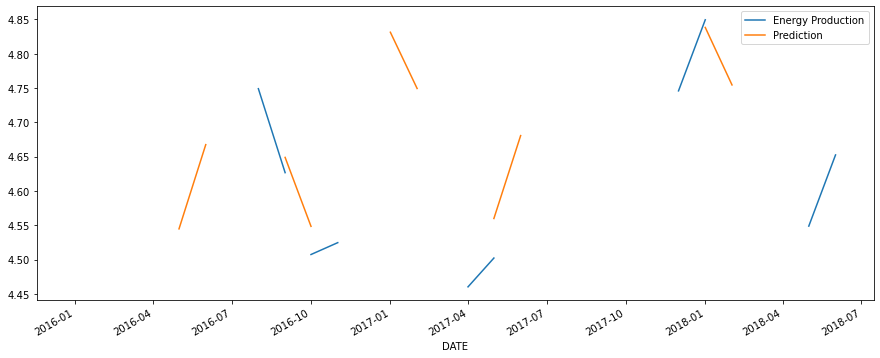

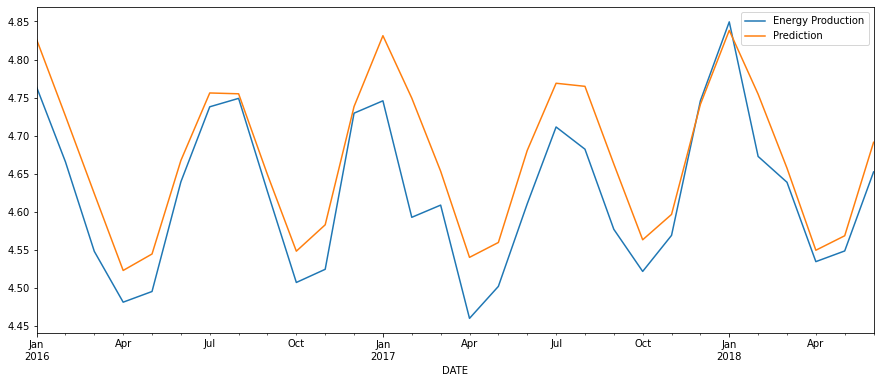

In [72]:
# Concating test and future_forecast to project a model 
pd.concat([test,future_forecast],axis=0).plot()
pd.concat([test,future_forecast],axis=1).plot()

In [74]:
# Convering into exponetial or original dataset
future_forecast2 = np.exp(future_forecast)

<AxesSubplot:xlabel='DATE'>

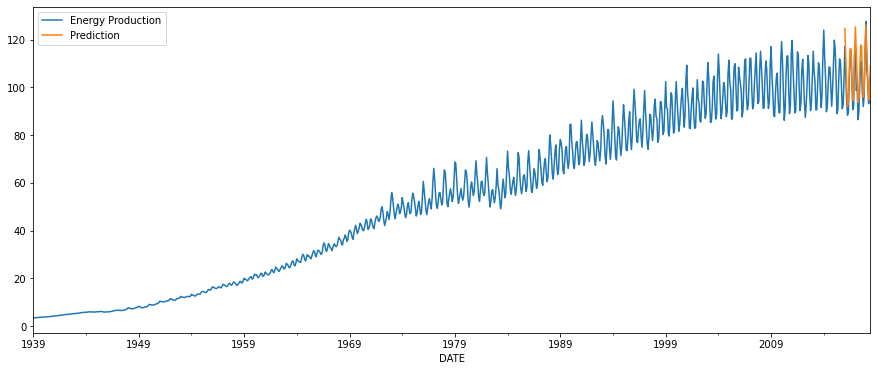

In [79]:
# Projecting original model by concating dta and future_forecast2
pd.concat([data,future_forecast2],axis=1).plot()

In [85]:
# Checking r2 score for accuracy of prediction
from sklearn.metrics import r2_score
print("r2score = ",r2_score(np.exp(test),future_forecast2))

r2score =  0.6412143961442156
